# K -Means Clustering - Implementation Lab
## Thomaskutty Reji - 20122011 
## Date: 05/05/2021

# Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [2]:
# importing the dataset 
df = pd.read_csv('/home/thomaskutty/Downloads/state_crime.csv')

In [3]:
# printing the head of the dataframe
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [4]:
df.State.value_counts()   
state = list(['United States','Florida', 'Maryland'])
florida = df[df['State'] ==  'Florida' ]
maryland = df[df['State'] ==  'Maryland' ]
Us = df[df['State'] ==  'United States' ]

d = pd.concat([florida,maryland])
df = pd.concat([d,Us])
df.shape

(159, 21)

In [5]:
# lets see what all the columns are available in the dataset 
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [6]:
## Selecting the some features from the dataframe

In [7]:
# selecting features 
# features = ['Data.Totals.Violent.Assault',
#        'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
#        'Data.Totals.Violent.Robbery','Data.Totals.Property.Burglary']
features = ['Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All']

In [8]:
# splitting the data into train and test 
X, y = train_test_split(df,test_size = 0.1, random_state = 38)
print(X.shape)
print(y.shape)

(143, 21)
(16, 21)


In [9]:
X = X[features]
y = y[features]
X.head()

,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All
1087,4535000,4709.8,1162.5,2965.5,581.8,767.8,428.3,9.6,39.6,290.3,213589
525,18328340,4140.5,1028.3,2765.7,346.5,688.9,452.0,6.4,32.6,197.9,758889
2735,267783607,4316.3,918.8,2891.8,505.7,611.0,382.1,6.8,35.9,186.2,11558475
2702,191141000,2197.5,634.7,1315.5,247.4,190.6,106.2,4.9,11.2,68.2,4200400
2745,301621157,3276.4,726.1,2185.4,364.9,471.8,287.2,5.7,30.6,148.3,9882212


# Transforming the data

In [10]:
# standardising 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_df = pd.DataFrame(scaler.transform(X),columns = X.columns)
scaled_df.head()

,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All
0,-0.717339,0.204924,-0.024956,0.212913,0.697130,0.532945,0.381334,0.402411,0.645525,0.669561,-0.701513
1,-0.595575,-0.192494,-0.304128,-0.014117,-0.691011,0.225176,0.527483,-0.899875,0.089584,-0.272506,-0.581977
2,1.606549,-0.069772,-0.531917,0.129169,0.248181,-0.078691,0.096436,-0.737089,0.351670,-0.391793,1.785416
3,0.929969,-1.548868,-1.122922,-1.661958,-1.275647,-1.718562,-1.604933,-1.510322,-1.610008,-1.594866,0.172442
4,1.905258,-0.795707,-0.932785,-0.673503,-0.582462,-0.621674,-0.488776,-1.184750,-0.069257,-0.778204,1.417960


# Finding the optimal value of k using elbow method

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

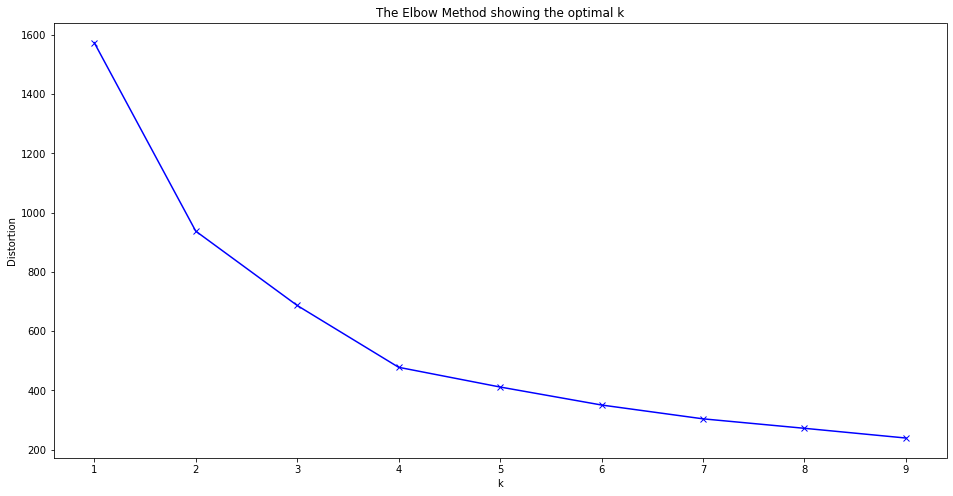

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Implementing k-means clustering using sklearn

We know that we selected the only three state data. so lets select the n_clusters as three so that we can compare by visualizations. 

In [12]:
kmeans = KMeans(n_clusters= 3, random_state=36).fit(scaled_df)
# getting the labels for the prediction
print(np.unique(kmeans.labels_))

y_predicted = kmeans.fit_predict(scaled_df)
print(y_predicted)

[0 1 2]
[2 2 1 0 1 2 0 2 1 2 0 0 2 1 2 2 1 2 1 1 0 1 2 0 2 2 0 0 1 2 0 0 0 2 2 1 2
 2 0 2 1 1 0 1 0 2 1 1 2 0 1 2 2 0 1 1 2 2 2 2 0 2 2 1 2 1 1 2 1 0 1 2 1 2
 1 1 2 0 1 1 1 2 0 2 0 2 0 2 1 2 2 2 2 1 2 0 2 2 2 2 2 1 0 1 2 2 1 0 0 2 2
 2 2 2 2 2 0 2 1 2 0 0 2 2 2 0 1 1 0 2 2 1 1 2 2 2 2 2 0 1 0 0 2]


In [13]:
scaled_df['cluster'] = y_predicted
scaled_df.head(5)

,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,Data.Rates.Violent.Rape,Data.Rates.Violent.Robbery,Data.Totals.Property.All,cluster
0,-0.717339,0.204924,-0.024956,0.212913,0.697130,0.532945,0.381334,0.402411,0.645525,0.669561,-0.701513,2
1,-0.595575,-0.192494,-0.304128,-0.014117,-0.691011,0.225176,0.527483,-0.899875,0.089584,-0.272506,-0.581977,2
2,1.606549,-0.069772,-0.531917,0.129169,0.248181,-0.078691,0.096436,-0.737089,0.351670,-0.391793,1.785416,1
3,0.929969,-1.548868,-1.122922,-1.661958,-1.275647,-1.718562,-1.604933,-1.510322,-1.610008,-1.594866,0.172442,0
4,1.905258,-0.795707,-0.932785,-0.673503,-0.582462,-0.621674,-0.488776,-1.184750,-0.069257,-0.778204,1.417960,1


# Plotting the clusters

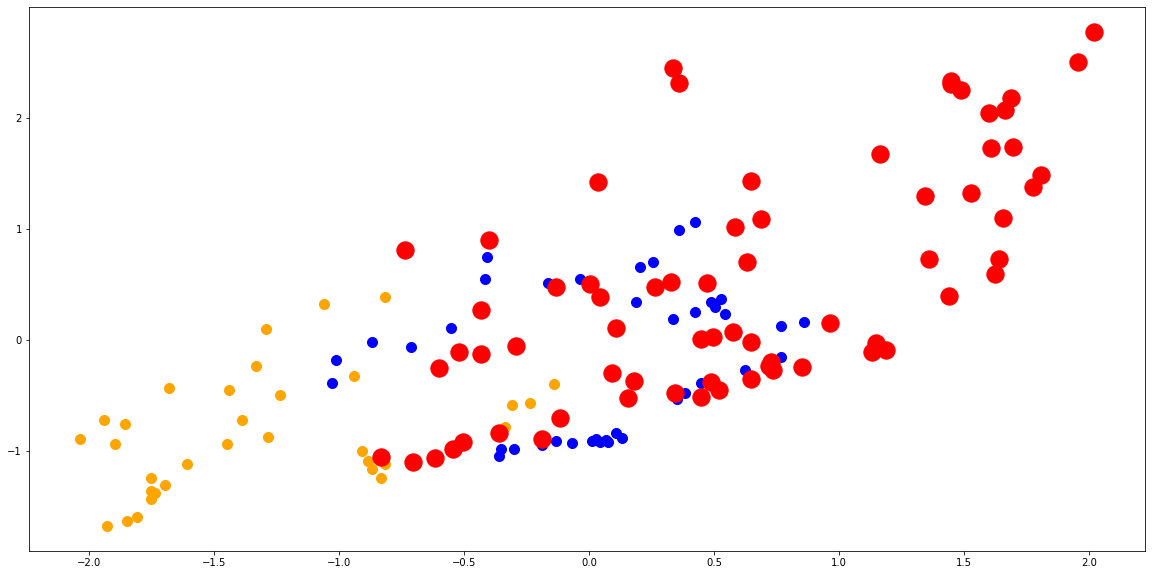

In [18]:

df1 = scaled_df[scaled_df.cluster == 0] 
df2 = scaled_df[scaled_df.cluster == 1] 
df3 = scaled_df[scaled_df.cluster == 2] 
# df4 = scaled_df[scaled_df.cluster == 3] 
# df5 = scaled_df[scaled_df.cluster == 4] 
plt.figure(figsize=(20,10))


# we select two random features to plot the scatter diagram.
plt.scatter(df1['Data.Rates.Violent.Rape'],df1['Data.Rates.Property.Burglary'], color = 'orange',s = 100)
plt.scatter(df2['Data.Rates.Violent.Rape'],df2['Data.Rates.Property.Burglary'], color = 'blue',s = 100)
plt.scatter(df3['Data.Rates.Violent.Rape'],df3['Data.Rates.Property.Burglary'], color = 'red',s = 300)
# plt.scatter(df4['Data.Rates.Violent.Rape'],df4['Data.Rates.Property.Burglary'], color = 'violet',s = 100)
# plt.scatter(df5['Data.Rates.Violent.Rape'],df5['Data.Rates.Property.Burglary'], color = 'cyan',s = 100,)
plt.show()

So, using the k-means clustering algorithm we classify the entire data into three classes. And the optimal value of the cluster is found by using elbow method. The method shows that the no of clusters is three of five.

--------------------------------------------------------------------------------------------

# Comparing the with the original clusters

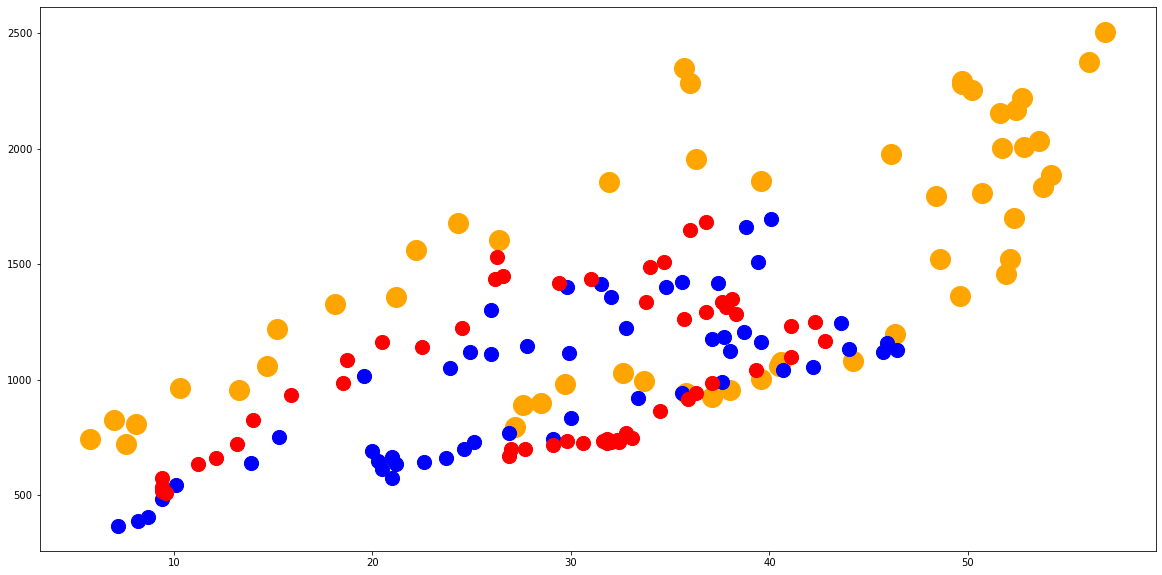

In [19]:
plt.figure(figsize=(20,10))    
plt.scatter(florida['Data.Rates.Violent.Rape'],florida['Data.Rates.Property.Burglary'], color = 'orange',s = 400)
plt.scatter(maryland['Data.Rates.Violent.Rape'],maryland['Data.Rates.Property.Burglary'], color = 'blue',s = 200)
plt.scatter(Us['Data.Rates.Violent.Rape'],Us['Data.Rates.Property.Burglary'], color = 'red',s = 200)

plt.show()

So, the algorithm could able to distinguish between the three state. Ofcourse this is not perfect clustering, but we can see that almost data points are clustered in the right fashion.